<div id="header"><p style="color:#3364ff; text-align:center; font-weight:bold; font-family:verdana; font-size:25px;">AI and ML: k-Nearest Neighbor</p></div>

<div id="header"><p style="color:#3364ff; text-align:center; font-weight:bold; font-family:verdana; font-size:25px;">AI and ML: Decision Tree. Python Implementation</p></div>

[licenseBDG]: https://img.shields.io/badge/License-CC-orange?style=plastic
[license]: https://creativecommons.org/licenses/by-nc-sa/3.0/deed.en

[mywebsiteBDG]:https://img.shields.io/badge/website-jaorduz.github.io-0abeeb?style=plastic
[mywebsite]: https://jaorduz.github.io/

[mygithubBDG-jaorduz]: https://img.shields.io/badge/jaorduz-repos-blue?logo=github&label=jaorduz&style=plastic
[mygithub-jaorduz]: https://github.com/jaorduz/

[mygithubBDG-jaorduc]: https://img.shields.io/badge/jaorduc-repos-blue?logo=github&label=jaorduc&style=plastic 
[mygithub-jaorduc]: https://github.com/jaorduc/

[myXprofileBDG]: https://img.shields.io/static/v1?label=Follow&message=jaorduc&color=2ea44f&style=plastic&logo=X&logoColor=black
[myXprofile]:https://twitter.com/jaorduc


[![website - jaorduz.github.io][mywebsiteBDG]][mywebsite]
[![Github][mygithubBDG-jaorduz]][mygithub-jaorduz]
[![Github][mygithubBDG-jaorduc]][mygithub-jaorduc]
[![Follow @jaorduc][myXprofileBDG]][myXprofile]
[![CC License][licenseBDG]][license]

<hr>

<p style="text-align:right; font-family:verdana;"><a href="https://jaorduz.github.io/" style="color:#3364ff; text-decoration:none;";name = "website">@Javier Orduz</a></p>    

<hr>


<h2>Objectives</h2>

*   Develop a classification model using Decision Tree Algorithm


In this lab exercise, you will learn a popular machine kNN algorithm. You will use this classification algorithm to build a model from Breast Cancer Wisconsi. Then you will use the kNN to classify and support to the medical diagnostic.


<h2>Table of contents</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="https://#whatisdectre">What is a kNN? Strengths and Limitations</a></li>
        <ol>
            <li><a href="https://#about_dataset">About the dataset</a></li>
            <li><a href="https://#entropy">The K-Nearest Neighbors Algorithm: A Tool for Classification</a></li>   
            <li><a href = "https://#downloadingData"> Downloading Dataset</a></li> 
        </ol>
        <li><a href="https://#modeling">Modeling</a></li>  
        <ol>
            <li><a href = "https//#settingupData">Setting up the Data </a></li>
        </ol>      
        <li><a href="https://#pre-processing">Pre-processing</a></li>
        <ol>
            <li><a href= "https//#standardization">Standardization of atributes and target</a></li>
        </ol>
        <li><a href="https://#classProcess">Classification Process</a></li>        
        <li><a href="https://#tranModel">Training the model</a></li>
            <ol>
            <li><a href="optModel">Model optimization and Metrics</a></li>
            </ol>
        <li><a href="https://#evaluation">Evaluation</a></li>
    </ol>
</div>
<br>
<hr>



<header><h2>Importing libraries, packages and modules</h2></header>


Import the Following Libraries:

<ul>
    <li> <b>numpy (as np)</b> </li>
    <li> <b>pandas</b> </li>
    <li> <b>DecisionTreeClassifier</b> from <b>sklearn.tree</b> </li>
</ul>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.metrics import accuracy_score


<hr>
<header><h2>1. What is kNN?: Strengths and Limitations</h2><header>


provide me a definition for k nearest neighbor, give me references, and use equation is LateX typesetting.

Key Strengths of KNN:
1. Simple and Interpretable – Easy to implement and explain.  
1. Adaptable – Works for both classification and regression.  
1. No Training Phase – Learns dynamically from data.  

Limitations:
1. Computationally Expensive – Slower with large datasets.  
1. Sensitive to Noise and irrelevant Features – Requires preprocessing.

<hr>
<div id="about_dataset">
    <h2>1.1 About the dataset</h2>

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.
n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34]. 
</div>

Attribute Information:

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry
j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignantsss

<hr>
<header><h2>1.2 The K-Nearest Neighbors Algorithm: A Tool for Classification </h2><header>

In the vast realm of machine learning algorithms, few techniques are as versatile and intuitive as the K-nearest neighbors (KNN) algorithm. As a nonparametric, instance-based learning method, KNN is widely used for classification, regression, and pattern recognition tasks. Its core principle relies on proximity-based decision-making, where new data points are classified based on the majority vote or average of their K closest neighbors in the feature space. Unlike many complex models, KNN requires no explicit training phase, making it exceptionally useful for real-time predictions. However, its performance depends heavily on distance metrics (Euclidean, Manhattan, or cosine similarity), the choice of K, and proper feature scaling. Studies have shown that KNN excels in low-dimensional datasets but may suffer from the "curse of dimensionality" in high-dimensional spaces (Cover & Hart, 1967; Altman, 1992).  


<header><h3>1.2.1 Hyperparameter Tuning in k-Nearest Neighbors (k-NN)</h3><header>

In k-Nearest Neighbors (k-NN), the primary hyperparameter to optimize is $ k $, the number of neighbors considered for prediction. The choice of $ k $ significantly impacts the model's bias-variance trade-off:  
- A small $ k $ (e.g., $ k = 1 $) leads to low bias but high variance (overfitting).  
- A large $ k $ (e.g., $ k = N $) increases bias but reduces variance (underfitting).  

The optimal $ k $ can be selected via cross-validation:  
$$
k^* = \argmin_{k} \frac{1}{N} \sum_{i=1}^{N} \left( y_i - \hat{y}_i^{(k)} \right)^2  
$$  
where $ \hat{y}_i^{(k)} $ is the prediction using $ k $ neighbors.  

 Additional Hyperparameters  
1. Distance Metric ($ d $):  
   - Euclidean distance (default for continuous features):  
     $$
     d(\mathbf{x}_i, \mathbf{x}_j) = \sqrt{\sum_{m=1}^{p} (x_{im} - x_{jm})^2}
     $$  
   - Manhattan distance (robust to outliers):  
     $$
     d(\mathbf{x}_i, \mathbf{x}_j) = \sum_{m=1}^{p} |x_{im} - x_{jm}|
     $$  
   - Cosine similarity (for text/data with sparsity):  
     $$
     d(\mathbf{x}_i, \mathbf{x}_j) = 1 - \frac{\mathbf{x}_i \cdot \mathbf{x}_j}{\|\mathbf{x}_i\| \|\mathbf{x}_j\|}
     $$  

2. Weighting Scheme:  
   - Uniform weights: All neighbors contribute equally.  
   - Distance-based weights: Closer neighbors have higher influence:  
     $$
     w_i = \frac{1}{d(\mathbf{x}_i, \mathbf{x}_j)}
     $$  

3. Algorithm Selection:  
   - Brute-force (exact search, slow for large $ N $).  
   - KD-tree or Ball-tree (efficient for low/medium dimensions).  


<hr>
<div id="downloading_data"> 
    <h2>1.3 Downloading and exploring the Data</h2>
    To download the data, we will use Ref. [[3](#references)]
</div>


In [2]:
df = pd.read_csv("../../DAT/data.csv")
df.shape

(569, 33)

In [3]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [6]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [7]:
type(df)

pandas.core.frame.DataFrame

In [8]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

<hr>
<div href="pre-processing">
    <h3>1.3.1 Dropping unnecessary columns</h3>
</div>


In [9]:
df.drop(columns=['id','Unnamed: 32'],inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Remove the column containing the target name since it doesn't contain numeric values.


<div href="modeling">
    <h2>2. Modeling</h2>
</div>

**4.1** import  ```preprocessing``` from ```skelearn``` to convert to numerical variables.

<hr>
<header><h3>2.1 Setting up the Data</h3> </header>

For the following step we should check the ```scikit-learn``` documentation, and paricularly, focus on the ```sklearn.model_selection``` module in Scikit-Learn that provides functions for splitting data into training and test sets, evaluating machine learning models, and performing cross-validation. The ```train_test_split()``` function is the most commonly used function in the ```sklearn.model_selection module.```

We will be using <b>train/test split</b> on our <b>decision tree</b>. Let's import <b>train_test_split</b> from <b>sklearn.cross_validation</b>.


```python 
from sklearn.model_selection import train_test_split
````

Now <b> train_test_split </b> will return 4 different parameters. We will name them:<br>
X_trainset, X_testset, y_trainset, y_testset <br> <br>
The <b> train_test_split </b> will need the parameters: <br>
X, y, test_size=0.2, and random_state=2. <br> <br>
The <b>X</b> and <b>y</b> are the arrays required before the split, the <b>test_size</b> represents the ratio of the testing dataset, and the <b>random_state</b> ensures that we obtain the same splits.


In [10]:
x_train,x_test,y_train,y_test=train_test_split(df.iloc[:,1:],df.iloc[:,0],test_size=0.2,random_state=2)

<hr>
<div href="pre-processing">
    <h2>3. Pre-processing</h2>

```python 
from sklearn.preprocessing import StandardScaler
```
</div>

We will standard the data ```StandardScaler()``` to $\mu = 0 $ and $\sigma = 1$ in the z-score parameter. This is AKA z-score normalization.

In [11]:

scaler = StandardScaler()

<hr>
<header><h3>3.1 Standardization of atributes and target</h3> </header>
We apply standardization onto ```x``` for the training and testint data set.

In [12]:
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

<hr>
<div href="classProcess">
    <h2>4. Classification Process</h2>

It requires the module
</div>

```python
from sklearn.neighbors import KNeighborsClassifier
```

In [13]:
knn = KNeighborsClassifier(n_neighbors=3)

<hr>
<div href="tranModel">
    <h2>5. Training the model</h2>
</div>
    For the following section we will need,

```python
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.dummy import DummyClassifier, DummyRegressor

```

In [14]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

It requires the module
```python
from sklearn.model_selection import GridSearchCV
```

In [15]:
parameters = {"n_neighbors":[1,3,5],
              "weights":["uniform","distance"]}
model_optim = GridSearchCV(knn, parameters, cv=5,scoring="accuracy")

<hr>
<div href="optModel">
    <h3>5.1 Model optimization and Metrics</h3>
</div>

In [16]:
model_optim.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': [1, 3, 5],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [17]:
model_optim.best_estimator_

KNeighborsClassifier(n_neighbors=3)

In [18]:
for (i,x,y) in zip(["Train","Test"],[X_train,X_test],[y_train,y_test]):
    print("Classification kNN",i," report:\n",classification_report(y,model_optim.predict(x)))

Classification kNN Train  report:
               precision    recall  f1-score   support

           B       0.97      1.00      0.98       288
           M       0.99      0.95      0.97       167

    accuracy                           0.98       455
   macro avg       0.98      0.97      0.98       455
weighted avg       0.98      0.98      0.98       455

Classification kNN Test  report:
               precision    recall  f1-score   support

           B       0.99      1.00      0.99        69
           M       1.00      0.98      0.99        45

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



In [19]:
for i in ["most_frequent","uniform"]:
    dummy = DummyClassifier(strategy=i).fit(X_train,y_train);
    print("Classification ",i," test report:",classification_report(y_test,dummy.predict(X_test)))

Classification  most_frequent  test report:               precision    recall  f1-score   support

           B       0.61      1.00      0.75        69
           M       0.00      0.00      0.00        45

    accuracy                           0.61       114
   macro avg       0.30      0.50      0.38       114
weighted avg       0.37      0.61      0.46       114

Classification  uniform  test report:               precision    recall  f1-score   support

           B       0.59      0.43      0.50        69
           M       0.38      0.53      0.44        45

    accuracy                           0.47       114
   macro avg       0.48      0.48      0.47       114
weighted avg       0.51      0.47      0.48       114



/usr/local/Caskroom/miniconda/base/envs/Py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/Caskroom/miniconda/base/envs/Py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/Caskroom/miniconda/base/envs/Py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

<hr>
<div id="evaluation">
    <h2>6. Evaluation</h2>
    Next, let's import <b>metrics</b> from sklearn and check the accuracy of our model.
</div>

You will need
```python
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
```

In [20]:
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.9912280701754386

In [21]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

Loop over k values and compute training and test data accuracy

In [22]:
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

Visualization

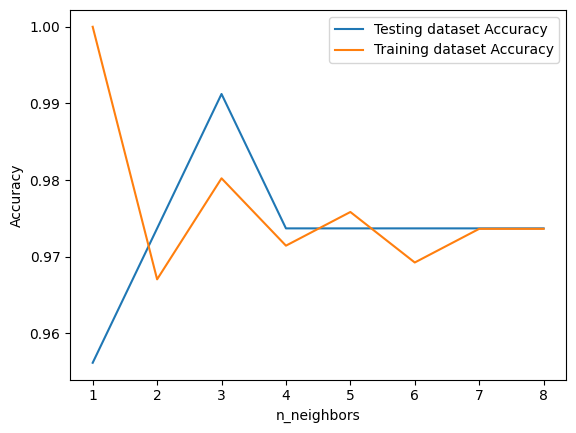

In [23]:
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')

plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

Here in the example shown above, we are creating a plot to see the k-value for which we have high accuracy.

**Note:** This is a technique which is not used industry-wide to choose the correct value of n_neighbors. Instead, we do hyperparameter tuning to choose the value that gives the best performance [Ref. [5](#references)].
<!-- **Accuracy classification score** computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in ```y_true.```

In multilabel classification, the function returns the subset accuracy. If the entire set of predicted labels for a sample strictly matches with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0. -->


<hr>

<div id="versions">
    <h2>Packages, and module versions</h2>

Let's check the version that can work with the different packages and modules.

</div>


In [24]:
import sys, sklearn
print("Python version",sys.version)
print('The scikit-learn version is {}.'.format(sklearn.__version__))

Python version 3.9.21 (main, Dec 11 2024, 10:23:52) 
[Clang 14.0.6 ]
The scikit-learn version is 1.6.1.


<hr>
<div id="exercises">
    <h2>Exercises</h2>

1. There some websites to download database:
    1. Research and describe all the steps, packages and coding parts of this NB,
    1. Analyze the metrics, and
    1. Create a report and include a short research about ```scikit-learn``` module and packages you used in this experiment [Ref. [12](#references)].

1. Submmit your report inside the repository https://code.cs.earlham.edu/cs365s2025/ICAKaggle. 
    1. You can use this template https://www.overleaf.com/read/xqcnnnrsspcp
1. Recommendations for the report: 
    1. Do not export as PDF the NB and submit it, instead you should create your own short report.
    1. You can use part of the code or NB, and take care of your screeenshots.
</div>


<hr>
<div id="references">
    <h2>References</h2>

[0] Cover, T., & Hart, P. (1967). *Nearest Neighbor Pattern Classification.* IEEE Transactions on Information Theory.  

[1] Altman, N. S. (1992). *An Introduction to Kernel and Nearest-Neighbor Nonparametric Regression.* The American Statistician.

[2] kNN Introduction to ML Algorithms. https://medium.com/@sachinsoni600517/k-nearest-neighbours-introduction-to-machine-learning-algorithms-9dbc9d9fb3b2

[3] Kaggle: kNN https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data/data

[4] Kaggle: kNN https://www.kaggle.com/code/mmdatainfo/k-nearest-neighbors

[5] geeksforgeeks: kNN https://www.geeksforgeeks.org/k-nearest-neighbor-algorithm-in-python/

[6] Hastie, T., Tibshirani, R., & Friedman, J. (2009). The Elements of Statistical Learning (2nd ed.). Springer.

[7] Murphy, K. P. (2012). Machine Learning: A Probabilistic Perspective.  MIT Press.
